**Importing the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


import collections


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,precision_recall_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

**Mounting the drive and loading the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Provide the path to your CSV file in your Google Drive
file_path = '/content/drive/MyDrive/credit_card.csv'
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exploratory Data Analysis and Data Preprocessing**

In [5]:
df.shape


(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().any().sum()

0

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

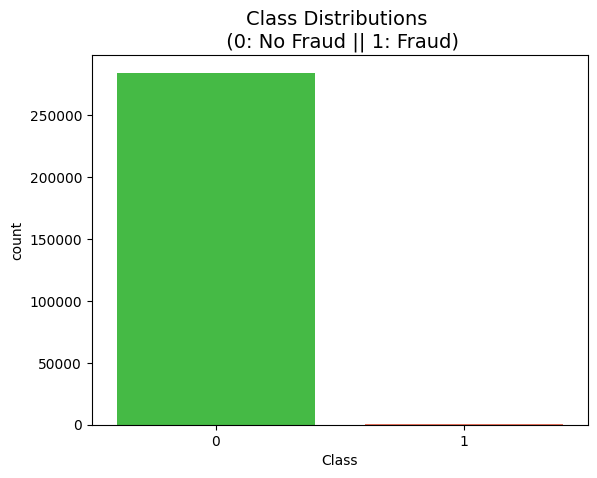

In [9]:
# to find the distribution or count of each class

green_color = '#32CD32'
red_color = "#FF6347"

# plotting the count plot
sns.countplot(x = 'Class', data = df, palette = [green_color, red_color])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize = 14)
plt.show()

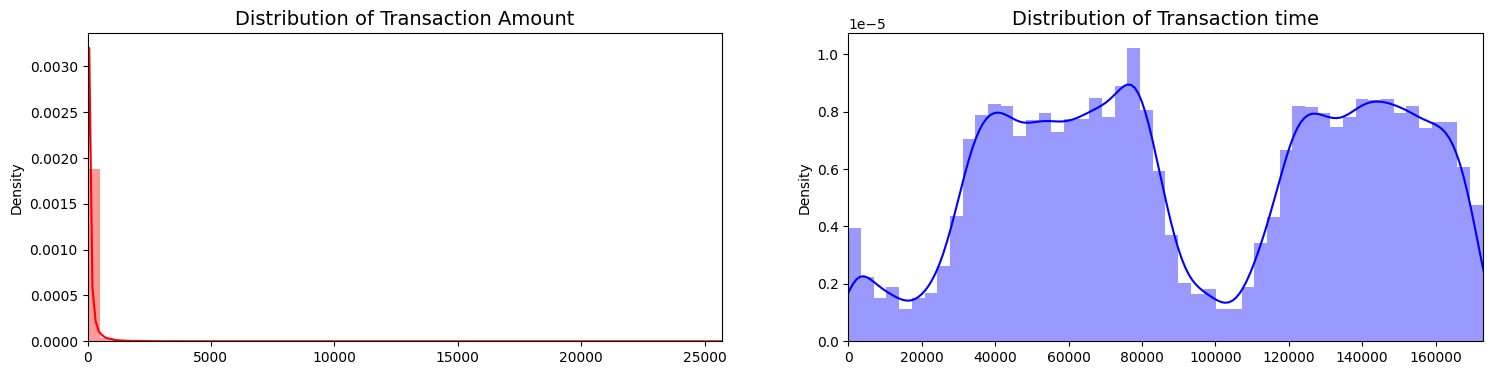

In [10]:
fig , ax = plt.subplots(1,2 , figsize = (18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values


sns.distplot( amount_val, ax= ax[0], color = 'r')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax = ax[1], color = 'b')
ax[1].set_title('Distribution of Transaction time', fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount']  = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))


df.drop(['Time','Amount'], axis=1, inplace=True)


In [12]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [13]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
df.isna().any().sum()

0

In [14]:

# identifying the percentage of actual transcations and fraudulent transactions

print('Percentage of Actual transactions %  -', round(df['Class'].value_counts()[0]/len(df)*100, 2))
print('Percentage of Fradulent transcations %  -', round(df['Class'].value_counts()[1]/len(df)*100, 2))



Percentage of Actual transactions %  - 99.83
Percentage of Fradulent transcations %  - 0.17


**Splitting the original data set using stratified shuffle split**

In [15]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X= df.drop('Class', axis = 1)
y = df['Class']

sss = StratifiedKFold(n_splits= 5, random_state = None, shuffle = False )

for train_index, test_index in sss.split (X,y):
  print('Train: ', train_index, 'Test : ', test_index)
  original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# checking the train and test label distribution

train_unique_label , train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)

print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test :  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test :  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test :  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test :  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test :  [212516 212644 213092 ... 284804 284805 284806]
[0.99827076 0.00172924]
[0.99827952 0.00172048]


**Forming new dataframe with equal class distribution**

In [16]:
df = df.sample(frac =1) # shuffling the rows of the original dataframe to remove the order

fraud_df = df.loc[df['Class'] == 1]   #
non_fraud_df = df.loc[df['Class'] == 0][:492]


normal_distributed_df = pd.concat([fraud_df, non_fraud_df]) # form a new data distribution

new_df = normal_distributed_df.sample(frac = 1, random_state = 42)



In [17]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
170878,-0.124083,0.419436,2.085243,0.153914,-1.937797,0.455977,0.457744,-1.599438,0.828357,-0.606184,...,-0.211955,0.146098,0.674611,-0.092485,0.116184,0.578814,-0.074287,-0.049963,-0.071206,0
59776,-0.293440,-0.419342,1.217941,0.783337,-0.070014,1.374358,-0.000839,-1.349727,0.403202,-0.348353,...,-0.022496,-0.013735,0.101074,-0.096465,0.643097,0.697356,-0.352676,0.041878,0.057699,0
253604,-0.305876,0.841586,-1.395255,-2.029520,-0.892758,-0.265047,4.838905,2.331911,-1.675067,1.128553,...,0.620608,0.673089,1.397317,0.289966,0.791811,-0.768241,0.639072,0.181215,0.285141,0
152599,-0.084539,0.149497,-1.539591,-0.737631,2.108255,-0.707423,1.592801,0.409632,-0.976533,0.500763,...,0.338805,-0.036972,-0.296853,-0.153482,-0.393920,0.351219,0.592818,-0.071041,0.067580,0
72513,-0.279746,-0.351872,1.158361,0.044473,0.559028,0.518260,-0.472905,-0.351330,-0.218754,0.154513,...,-0.218883,-0.182300,-0.606251,0.197103,0.176732,0.035088,0.099325,-0.026231,0.004223,0


In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


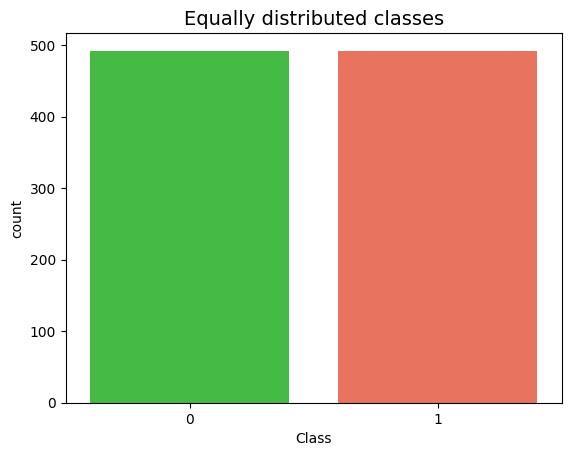

In [21]:
colors = [green_color, red_color]
sns.countplot(x = 'Class', data = new_df, palette = [green_color, red_color])
plt.title('Equally distributed classes', fontsize = 14)
plt.show()

**Measuring Correlation between Variables in the dataset**

Text(0.5, 1.0, 'SubSample Correlation Matrix')

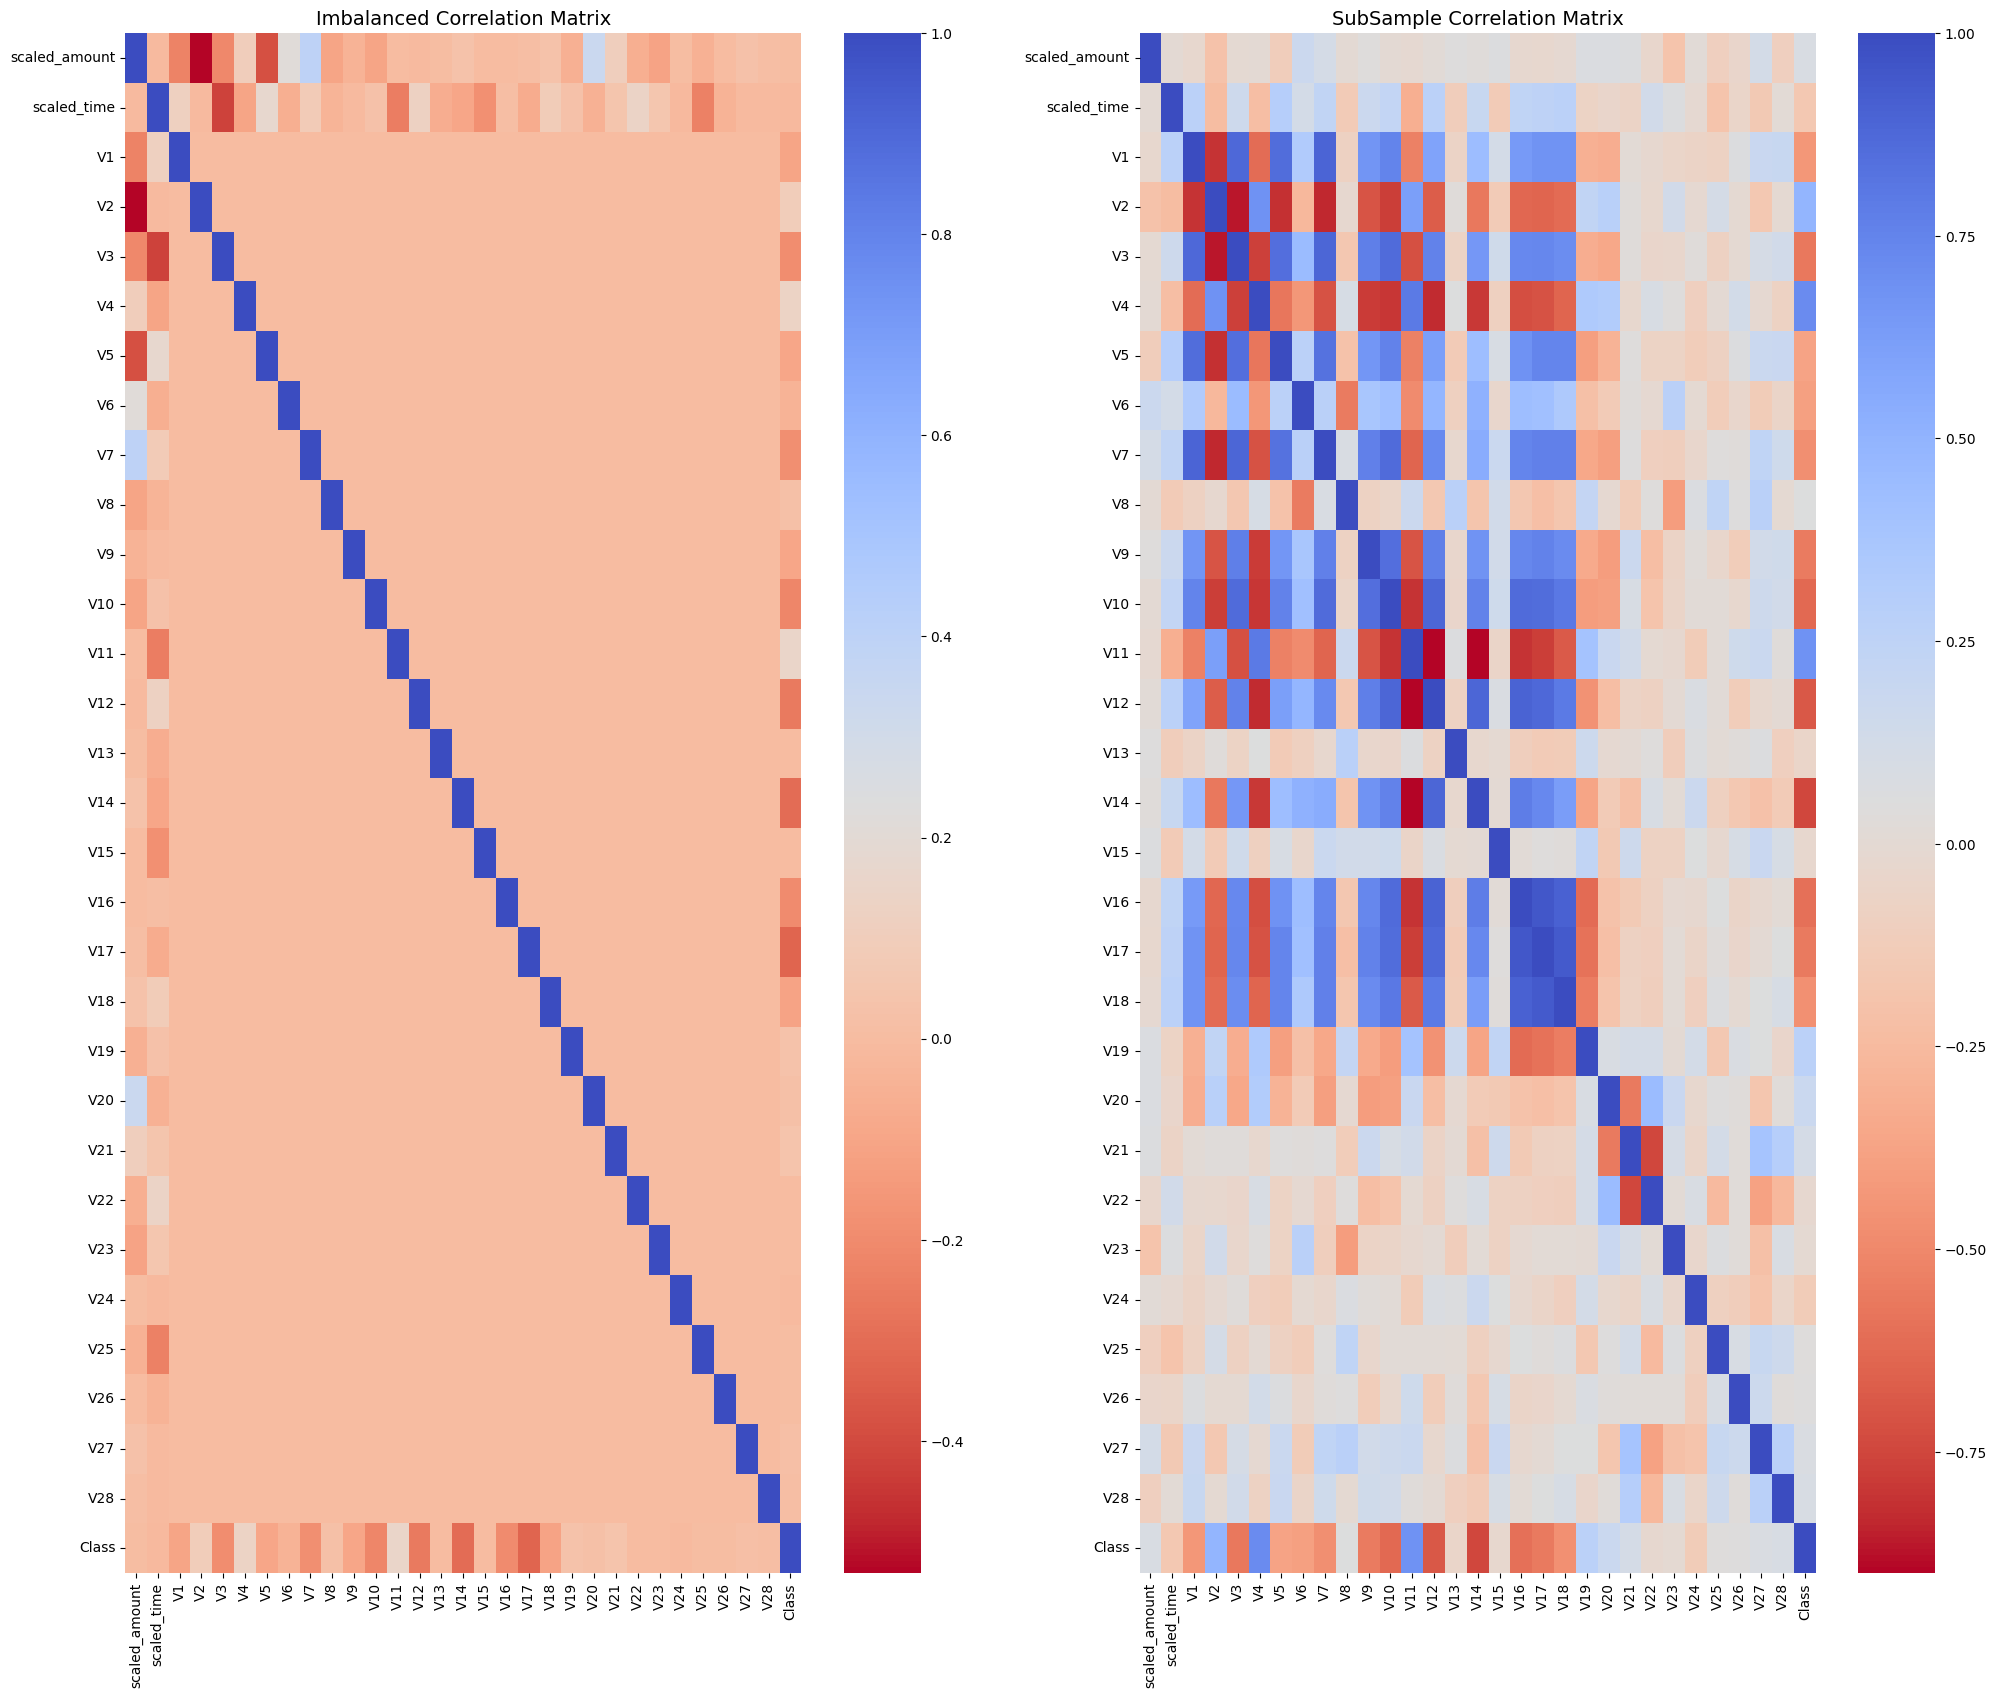

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (24,20))

# entire data frame
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size': 20}, ax = ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws = {'size': 20}, ax = ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize = 14)


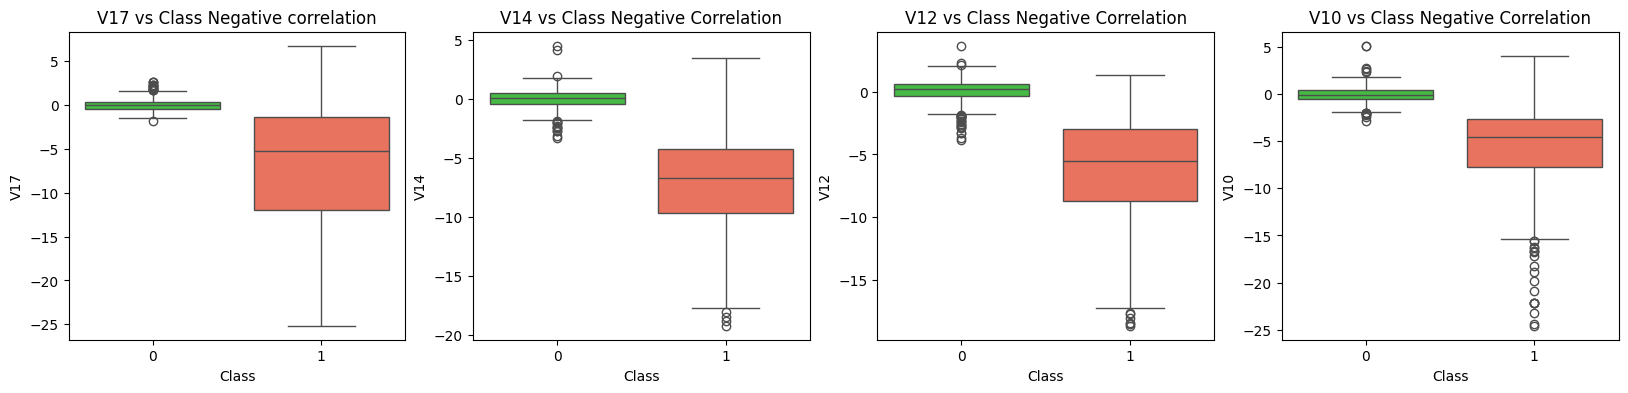

In [22]:
f, axes = plt.subplots(ncols =4 , figsize = (20,4))

sns.boxplot(x= 'Class', y = 'V17', data = new_df, palette = colors, ax = axes[0])
axes[0].set_title('V17 vs Class Negative correlation')


sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()


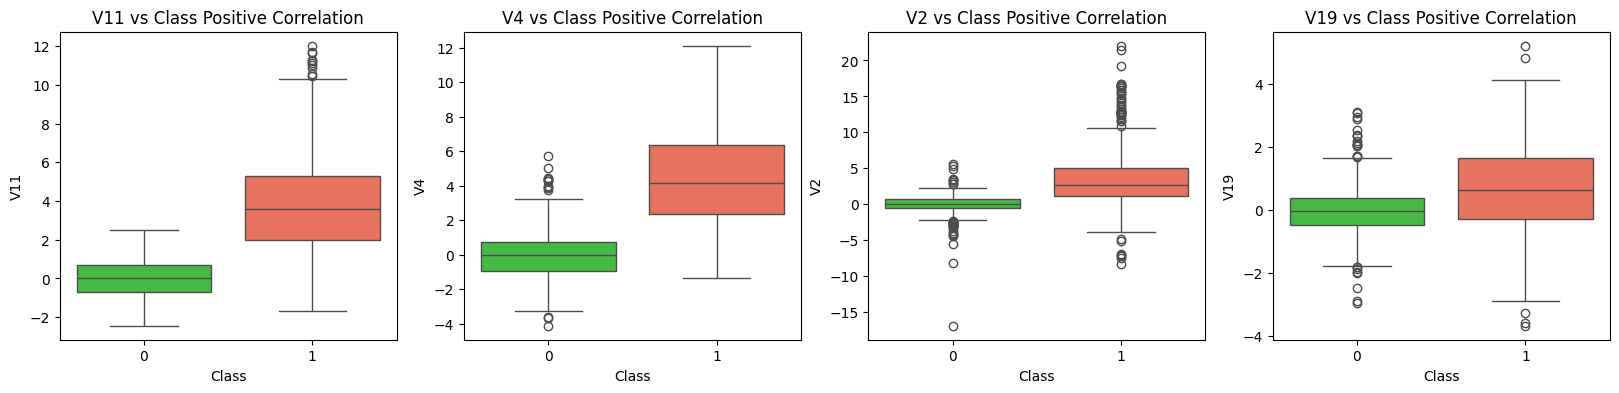

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

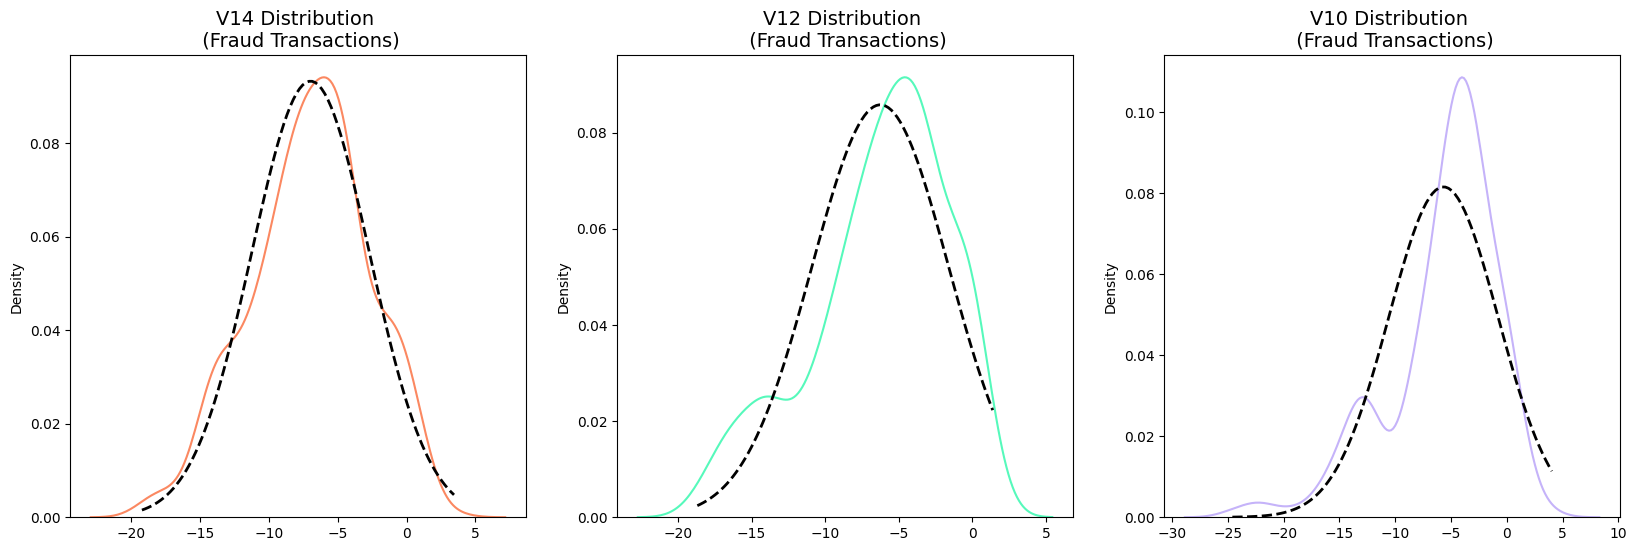

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Assume new_df is your DataFrame and it has been defined previously

# Set up the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# V14 Distribution (Fraud Transactions)
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.kdeplot(v14_fraud_dist, ax=ax1, color='#FB8861')
mu, sigma = norm.fit(v14_fraud_dist)
x = np.linspace(min(v14_fraud_dist), max(v14_fraud_dist), 100)
p = norm.pdf(x, mu, sigma)
ax1.plot(x, p, 'k', linewidth=2, linestyle='--')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# V12 Distribution (Fraud Transactions)
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.kdeplot(v12_fraud_dist, ax=ax2, color='#56F9BB')
mu, sigma = norm.fit(v12_fraud_dist)
x = np.linspace(min(v12_fraud_dist), max(v12_fraud_dist), 100)
p = norm.pdf(x, mu, sigma)
ax2.plot(x, p, 'k', linewidth=2, linestyle='--')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

# V10 Distribution (Fraud Transactions)
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.kdeplot(v10_fraud_dist, ax=ax3, color='#C5B3F9')
mu, sigma = norm.fit(v10_fraud_dist)
x = np.linspace(min(v10_fraud_dist), max(v10_fraud_dist), 100)
p = norm.pdf(x, mu, sigma)
ax3.plot(x, p, 'k', linewidth=2, linestyle='--')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()


**Identifying and removing Outliers**

In [25]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.69272296475 | Quartile 75: -4.2828208495
iqr: 5.40990211525
Cut Off: 8.114853172875002
V14 Lower: -17.807576137625002
V14 Upper: 3.8320323233750013
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.82208674, -19.21432549, -18.04999769, -18.49377336]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.343037158875
V12 Upper: 5.776973386125
V12 outliers: [-18.55369701, -18.43113103, -18.04759657, -18.68371463]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 974
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.898854632625
V10 Upper: 4.920334958374999
V10 outliers: [-15.56379134, -17.14151364, -16.74604411, -15.23183337, -16.60119697, -20.94919155, -15

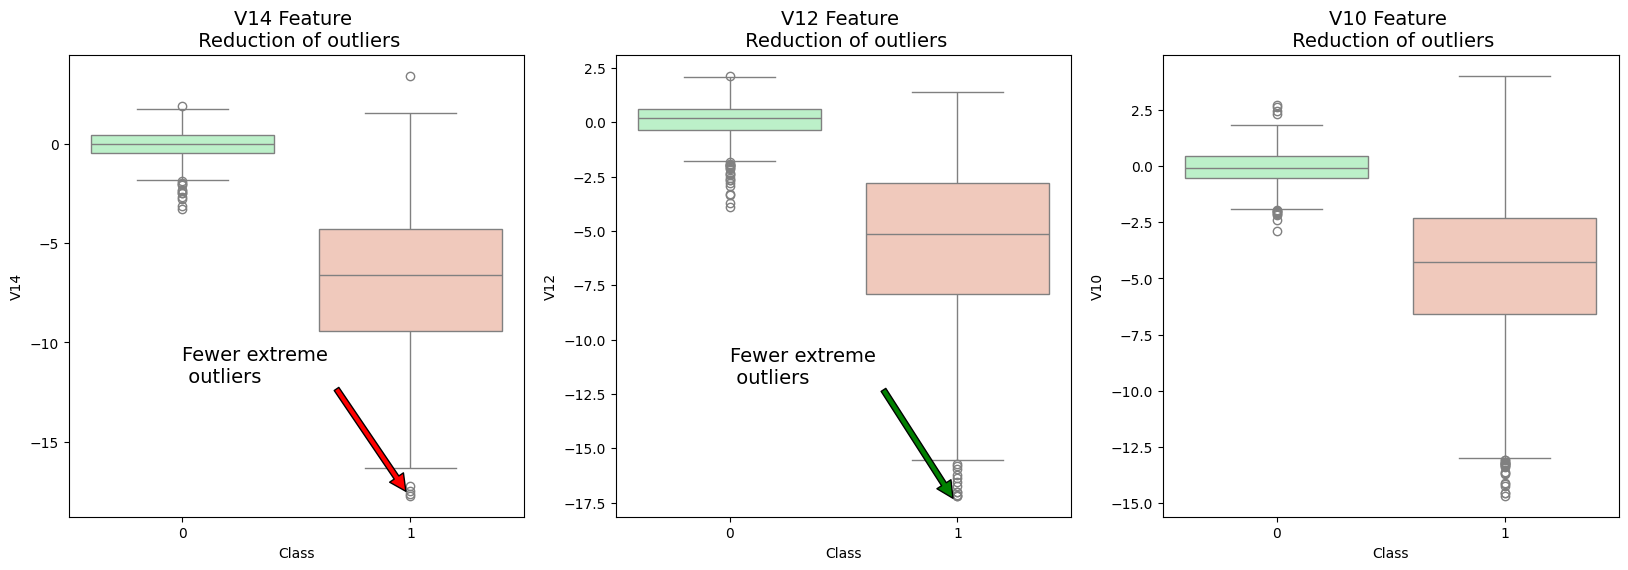

In [26]:
colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='red'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='green'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

**Dimensionality reduction**

In [27]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 7.7 s


In [28]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.027 s


In [29]:
# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

Truncated SVD took 0.05 s


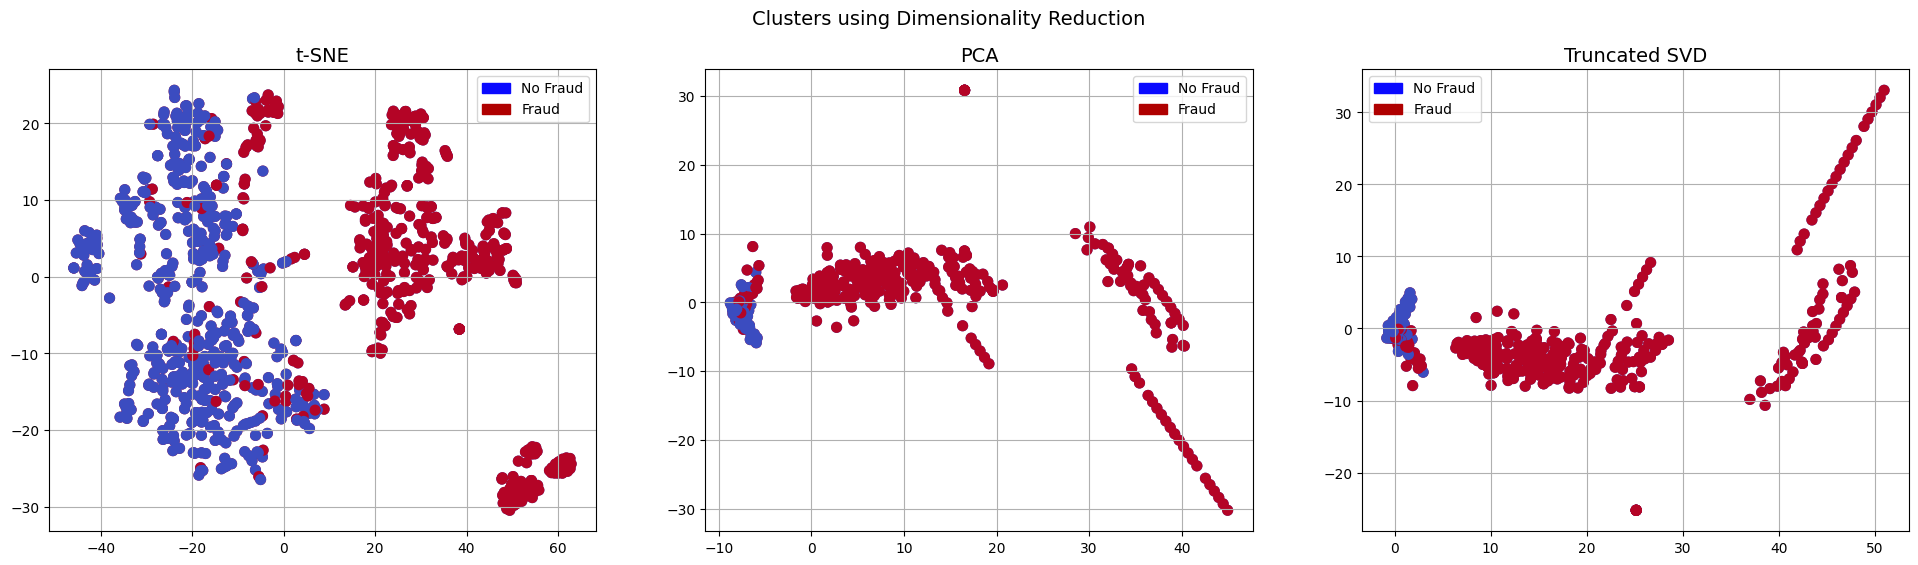

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [31]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [32]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [34]:
X_train.shape

(756, 30)

**Model selection**

In [35]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression has a training score of 94.0 % accuracy score
KNeighborsClassifier has a training score of 94.0 % accuracy score
SVC has a training score of 94.0 % accuracy score
DecisionTreeClassifier has a training score of 91.0 % accuracy score
RandomForestClassifier has a training score of 95.0 % accuracy score


**Finding best estimator for each model using GridSearchCV**




In [36]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


# Random Forest Classifier
rf_params = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
# Random Forest best estimator
rf_clf = grid_rf.best_estimator_



**Cross Validation Scores of Best estimators**

In [37]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_score =  round(log_reg_score.mean() * 100, 2)
print('Logistic Regression - CV Score:', log_reg_score)

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
knears_score = round(knears_score.mean() * 100, 2)
print('Knears Classifier - CV Score:', knears_score)


svc_score = cross_val_score(svc, X_train, y_train, cv=5)
svc_score = round(svc_score.mean() * 100, 2)
print('Support Vector Classifier - CV Score:', svc_score)

decision_tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
decision_tree_score = round(decision_tree_score.mean() * 100, 2)
print('Decision Tree Classifier - CV Score:', decision_tree_score)

random_forest_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
random_forest_score = round(random_forest_score.mean() * 100, 2)
print('Random Forest Classifier - CV Score:', random_forest_score )

Logistic Regression - CV Score: 94.05
Knears Classifier - CV Score: 95.24
Support Vector Classifier - CV Score: 94.18
Decision Tree Classifier - CV Score: 93.12
Random Forest Classifier - CV Score: 94.98


**Predicting ROC AUC scores for the best estimators**

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score


log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

print('ROC AUC Score Logistic Regression:',roc_auc_score(y_train, log_reg_pred))

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
print('ROC AUC Score K Neighbors Classifier:',roc_auc_score(y_train, knears_pred))

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")
print('ROC AUC Score Support Vector Classifier:',roc_auc_score(y_train, svc_pred))

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
print('ROC AUC Score Decision Tree Classifier:',roc_auc_score(y_train, tree_pred))

rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)
print('ROC AUC Score Random Forest Classifier:',roc_auc_score(y_train, rf_pred))

ROC AUC Score Logistic Regression: 0.9752638799451242
ROC AUC Score K Neighbors Classifier: 0.9520956407313044
ROC AUC Score Support Vector Classifier: 0.9736050060195425
ROC AUC Score Decision Tree Classifier: 0.9309572472492089
ROC AUC Score Random Forest Classifier: 0.9466920514040934


**Creating a data frame for CV and ROC scores**

In [39]:
scores_df = pd.DataFrame({
    'Cross Val Acc.': [log_reg_score, knears_score, svc_score, decision_tree_score, random_forest_score],
    'ROC AUC': [roc_auc_score(y_train, log_reg_pred), roc_auc_score(y_train, knears_pred), roc_auc_score(y_train, svc_pred), roc_auc_score(y_train, tree_pred), roc_auc_score(y_train, rf_pred)]
}, index=['Log Regression', 'K Nears', 'Support Vectors', 'Decision Trees', 'Random Forest'])
scores_df

,Cross Val Acc.,ROC AUC
Log Regression,94.05,0.975264
K Nears,95.24,0.952096
Support Vectors,94.18,0.973605
Decision Trees,93.12,0.930957
Random Forest,94.98,0.946692


**Plotting ROC-AUC curve for each estimator**

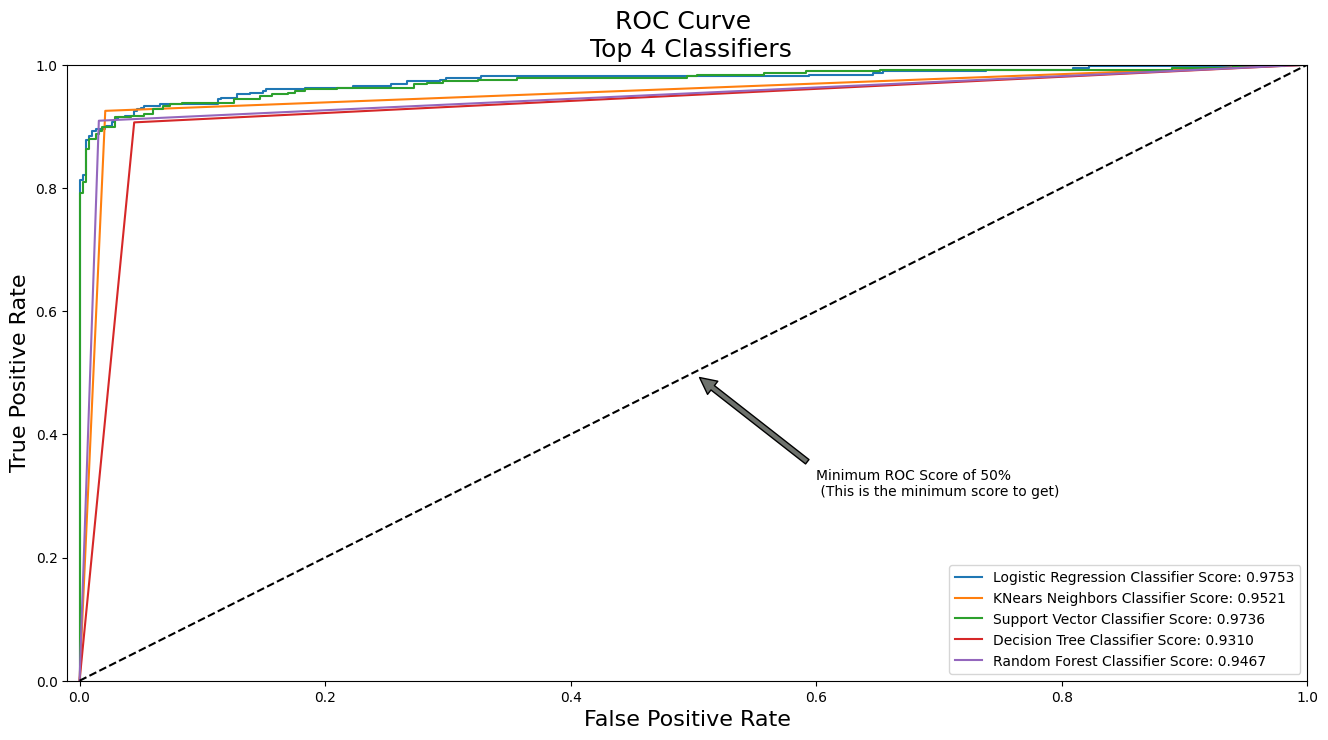

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
rf_fpr , rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr)
plt.show()


**Evaluating the best model on Undersampled Data  - Training data**

Accuracy Score: 0.9404761904761905
ROC AUC Score: 0.9402315424027774
Recall Score: 0.9171122994652406
Precision Score: 0.9607843137254902
F1 Score: 0.9384404924760602
Confusion Matrix:
[[368  14]
 [ 31 343]]


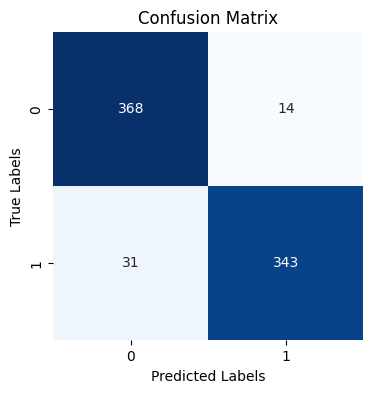

In [41]:
# evaluation of the best model on randomly undersampled train data
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="predict")

# Calculate evaluation metrics
accuracy_train = accuracy_score(y_train, log_reg_pred)
roc_auc_train = roc_auc_score(y_train, log_reg_pred)
recall_train = recall_score(y_train, log_reg_pred)
precision_train = precision_score(y_train, log_reg_pred)
f1_train = f1_score(y_train, log_reg_pred)
conf_matrix_train = confusion_matrix(y_train, log_reg_pred)

# Print evaluation metrics
print("Accuracy Score:", accuracy_train)
print("ROC AUC Score:", roc_auc_train)
print("Recall Score:", recall_train)
print("Precision Score:", precision_train)
print("F1 Score:", f1_train)
print("Confusion Matrix:")
print(conf_matrix_train)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [42]:
from sklearn.metrics import classification_report


print('Logistic Regression_Train_report_undersampled_data: \n')
print(classification_report(y_train, log_reg_pred))

Logistic Regression_Train_report_undersampled_data: 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       382
           1       0.96      0.92      0.94       374

    accuracy                           0.94       756
   macro avg       0.94      0.94      0.94       756
weighted avg       0.94      0.94      0.94       756



**Evaluation of best model on Undersampled data - Test Data**

Accuracy Score: 0.9365079365079365
ROC AUC Score: 0.9342464196408273
Recall Score: 0.9156626506024096
Precision Score: 0.9382716049382716
F1 Score: 0.9268292682926829
Confusion Matrix:
[[101   5]
 [  7  76]]


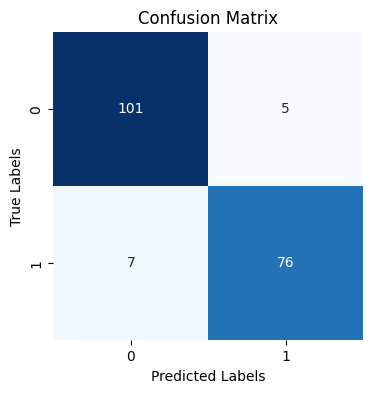

In [44]:
# evaluation of the best model on randomly undersampled test data

log_pred_test = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, log_pred_test)
roc_auc_test = roc_auc_score(y_test, log_pred_test)
recall_test = recall_score(y_test, log_pred_test)
precision_test = precision_score(y_test, log_pred_test)
f1_test = f1_score(y_test, log_pred_test)
conf_matrix_test = confusion_matrix(y_test, log_pred_test)

print("Accuracy Score:", accuracy_test)
print("ROC AUC Score:", roc_auc_test)
print("Recall Score:", recall_test)
print("Precision Score:", precision_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(conf_matrix_test)


plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
new_df.shape

(943, 31)

**Logistic regression evaluated on singlefold CV dataset (1 out of 5)**

0.9990519829356929
0.7397695391752537
0.47959183673469385
0.94
0.6351351351351351
[[56860     3]
 [   51    47]]


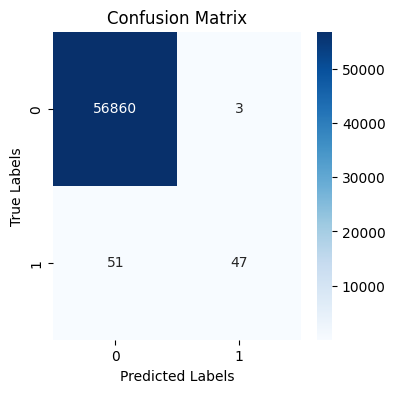

In [45]:
log_reg_orig = LogisticRegression()
log_reg_original = log_reg_orig.fit(original_Xtrain,original_ytrain )
y_pred_original = log_reg_orig.predict(original_Xtest)

# X_train_orgi, X_test_orgi, y_train_orgi, y_test_orgi = train_test_split(df.drop('Class',1), df.Class, test_size = 0.2,random_state = 0)


print(accuracy_score(original_ytest, y_pred_original))
print(roc_auc_score(original_ytest, y_pred_original))
print(recall_score(original_ytest, y_pred_original))
print(precision_score(original_ytest, y_pred_original))
print(f1_score(original_ytest, y_pred_original))

print(confusion_matrix(original_ytest, y_pred_original))


conf_matrix_original = confusion_matrix(original_ytest, y_pred_original)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_original, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Logisitic Regression with Smote**

Initial '1' labels count in y_train:  394
Initial '0' labels count in y_train:  227452
Shape of train_x after OverSampling:  (454904, 30)
Shape of train_y after OverSampling:  (454904,)
Percentage of '1' labels after OverSampling: 50.00%
Percentage of '0' labels after OverSampling: 50.00%


<Axes: ylabel='count'>

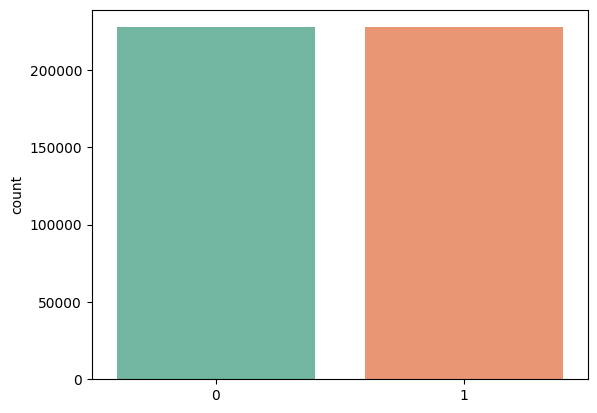

In [46]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Before OverSampling
print("Initial '1' labels count in y_train: ", sum(original_ytrain==1))
print("Initial '0' labels count in y_train: ", sum(original_ytrain==0))

# Applying SMOTE
sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(original_Xtrain, original_ytrain.ravel())

# After OverSampling
print("Shape of train_x after OverSampling: ", x_train_s.shape)
print("Shape of train_y after OverSampling: ", y_train_s.shape)

print("Percentage of '1' labels after OverSampling: {:.2f}%".format(sum(y_train_s==1)/len(y_train_s)*100))
print("Percentage of '0' labels after OverSampling: {:.2f}%".format(sum(y_train_s==0)/len(y_train_s)*100))

# Visualizing the distribution with a different palette
sns.countplot(x=y_train_s, palette='Set2')


Text(0.5, 23.52222222222222, 'Predicted Label')

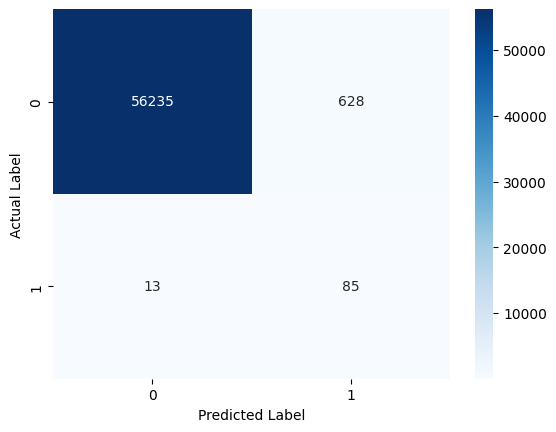

In [47]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(x_train_s, y_train_s)
y_pred_smote = log_reg_smote.predict(original_Xtest)
conf_matrix_smote = confusion_matrix(original_ytest, y_pred_smote)

sns.heatmap(conf_matrix_smote, annot=True, cmap="Blues", fmt='d', cbar = True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



In [48]:
print(classification_report(original_ytest, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.12      0.87      0.21        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.60     56961
weighted avg       1.00      0.99      0.99     56961



Text(0.5, 1.0, 'Precision Recall Curve')

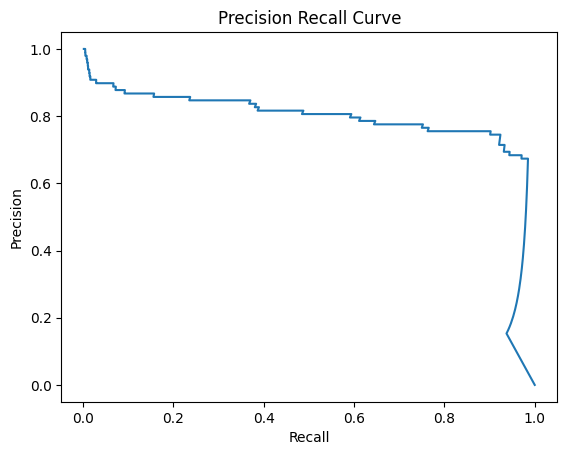

In [49]:
y_pred_prob_smote = log_reg_smote.predict_proba(original_Xtest)[:,1]
precision, recall, thresholds = precision_recall_curve(original_ytest, y_pred_prob_smote)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

**Logistic regression with RandomUnderSampler**

Initial '1' labels count in y_train:  394
Initial '0' labels count in y_train:  227452
Shape of train_x after UnderSampling:  (788, 30)
Shape of train_y after UnderSampling:  (788,)
Percentage of '1' labels after UnderSampling: 50.00%
Percentage of '0' labels after UnderSampling: 50.00%


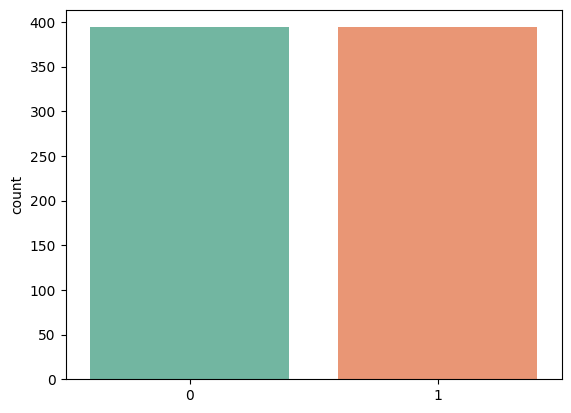

In [50]:
from imblearn.under_sampling import RandomUnderSampler

# Before UnderSampling
print("Initial '1' labels count in y_train: ", sum(original_ytrain==1))
print("Initial '0' labels count in y_train: ", sum(original_ytrain==0))

# Applying RandomUnderSampler
rus = RandomUnderSampler(random_state=2)
x_train_us, y_train_us = rus.fit_resample(original_Xtrain, original_ytrain.ravel())


# After UnderSampling
print("Shape of train_x after UnderSampling: ", x_train_us.shape)
print("Shape of train_y after UnderSampling: ", y_train_us.shape)

print("Percentage of '1' labels after UnderSampling: {:.2f}%".format(sum(y_train_us==1)/len(y_train_us)*100))
print("Percentage of '0' labels after UnderSampling: {:.2f}%".format(sum(y_train_us==0)/len(y_train_us)*100))


# Visualizing the distribution with a different palette
sns.countplot(x=y_train_us, palette='Set2')
plt.show()

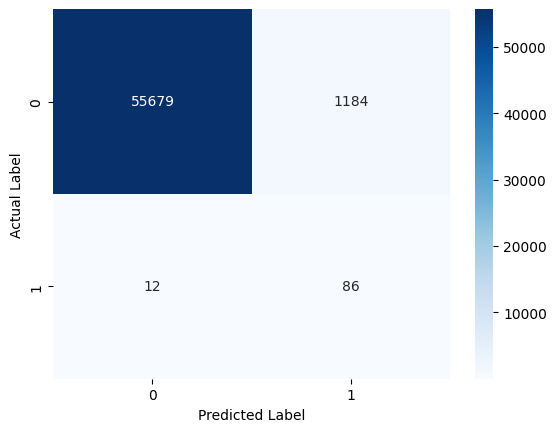

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.88      0.13        98

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.56     56961
weighted avg       1.00      0.98      0.99     56961



In [51]:
# Training Logistic Regression on the undersampled data
log_reg_under = LogisticRegression()
log_reg_under.fit(x_train_us, y_train_us)

# Predicting on the test set
y_pred_under = log_reg_under.predict(original_Xtest)

# Creating confusion matrix and classification report
conf_matrix_under = confusion_matrix(original_ytest, y_pred_under)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_under, annot=True, cmap="Blues", fmt='d', cbar=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Printing the classification report
print(classification_report(original_ytest, y_pred_under))